In [1]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install kmapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


In [3]:
import kmapper as km
from kmapper.jupyter import display
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df1 = pd.read_csv('https://raw.githubusercontent.com/kevingonzalezd/csv/main/wine-clustering.csv')
df1.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [44]:
df1 = pd.read_csv('https://raw.githubusercontent.com/kevingonzalezd/csv/main/wine-clustering.csv')

var1='Flavanoids'
var2='OD280'
df = pd.concat([df1[var1] , df1[var2]], axis=1)

df

,Flavanoids,OD280
0,3.06,3.92
1,2.76,3.40
2,3.24,3.17
3,3.49,3.45
4,2.69,2.93
...,...,...
173,0.61,1.74
174,0.75,1.56
175,0.69,1.56
176,0.68,1.62


Veamos la información básica de la base de datos de aquellos valores no categóricos.

In [45]:
data = df.to_numpy()
data

array([[3.06, 3.92],
       [2.76, 3.4 ],
       [3.24, 3.17],
       [3.49, 3.45],
       [2.69, 2.93],
       [3.39, 2.85],
       [2.52, 3.58],
       [2.51, 3.58],
       [2.98, 2.85],
       [3.15, 3.55],
       [3.32, 3.17],
       [2.43, 2.82],
       [2.76, 2.9 ],
       [3.69, 2.73],
       [3.64, 3.  ],
       [2.91, 2.88],
       [3.14, 2.65],
       [3.4 , 2.57],
       [3.93, 2.82],
       [3.03, 3.36],
       [3.17, 3.71],
       [2.41, 3.52],
       [2.88, 4.  ],
       [2.37, 3.63],
       [2.61, 3.82],
       [2.68, 3.2 ],
       [2.94, 3.22],
       [2.19, 2.77],
       [2.97, 3.4 ],
       [2.33, 3.59],
       [3.25, 2.71],
       [3.19, 2.88],
       [2.69, 2.87],
       [2.74, 3.  ],
       [2.53, 2.87],
       [2.98, 3.47],
       [2.68, 2.78],
       [2.43, 2.51],
       [2.64, 2.69],
       [3.04, 3.53],
       [3.29, 3.38],
       [2.68, 3.  ],
       [3.56, 3.56],
       [2.63, 3.  ],
       [3.  , 3.35],
       [2.65, 3.33],
       [3.17, 3.44],
       [3.39,

In [46]:
mean_other_score=(data[:,1])

In [47]:
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(data, projection=[0] )


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (178, 2)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()



In [48]:
covering=km.Cover(n_cubes=4,perc_overlap=0.2)

In [49]:
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.KMeans(n_clusters=4),cover=covering)

Mapping on data shaped (178, 2) using lens shaped (178, 1)

Creating 4 hypercubes.

Created 6 edges and 12 nodes in 0:00:00.014677.


In [50]:
G['meta_data']

{'projection': '[0]',
 'n_cubes': 4,
 'perc_overlap': 0.2,
 'clusterer': 'KMeans(n_clusters=4)',
 'scaler': 'MinMaxScaler()'}

In [51]:
mapper.visualize(G,
                title='Gráfico de clusters',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = mean_other_score,
                color_function_name = 'Variables',

                node_color_function=np.array(['average','std','sum','max','min']))

km.jupyter.display("level_education_math" + ".html")

Wrote visualization to: mapper_visualization_output.html


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


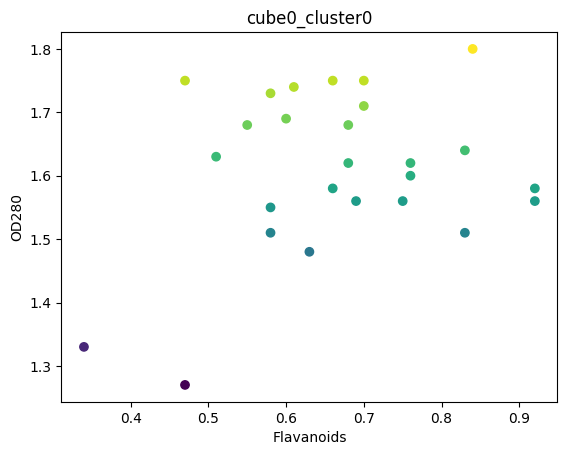

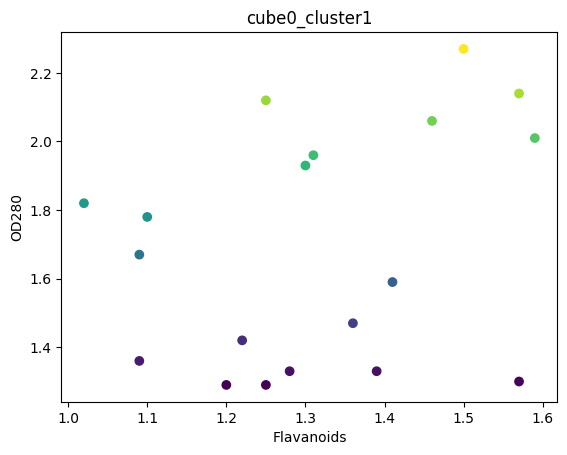

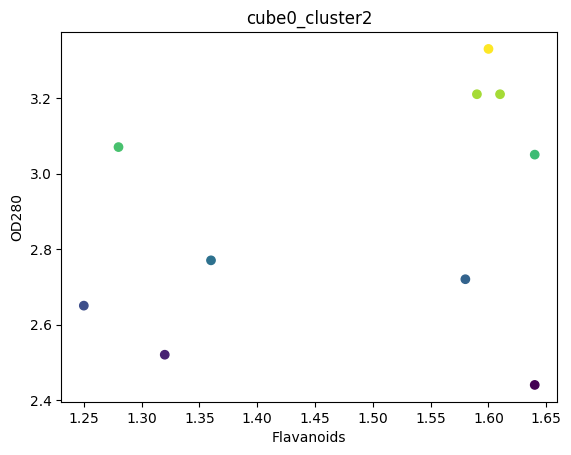

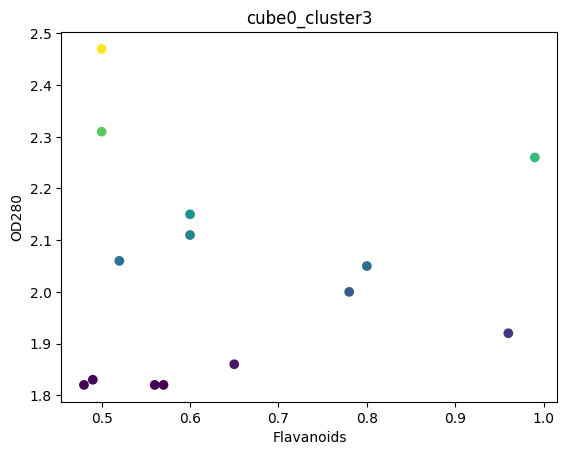

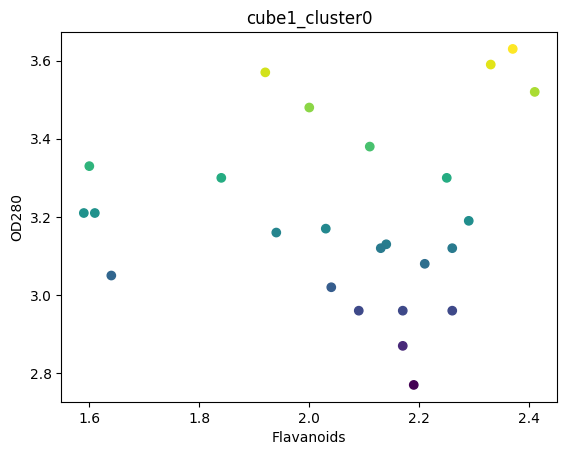

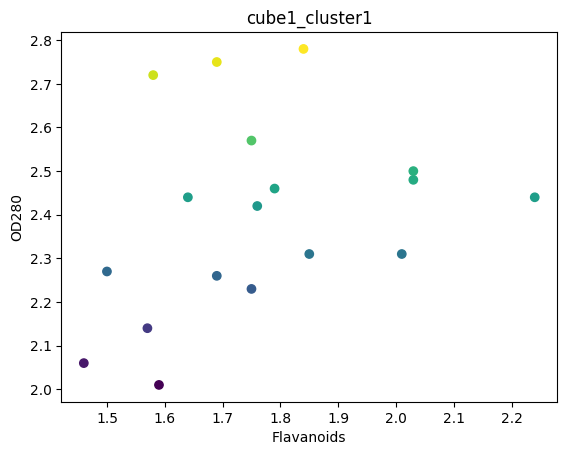

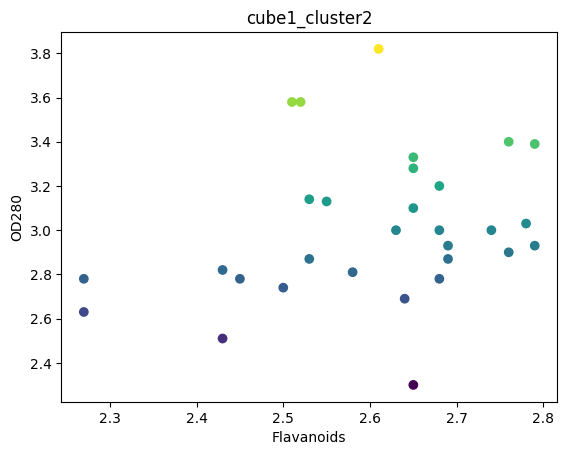

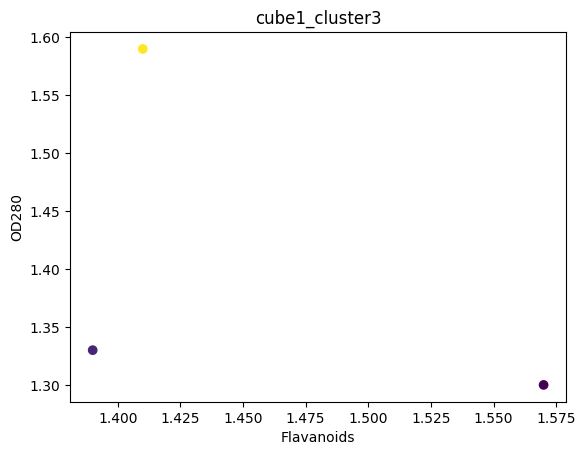

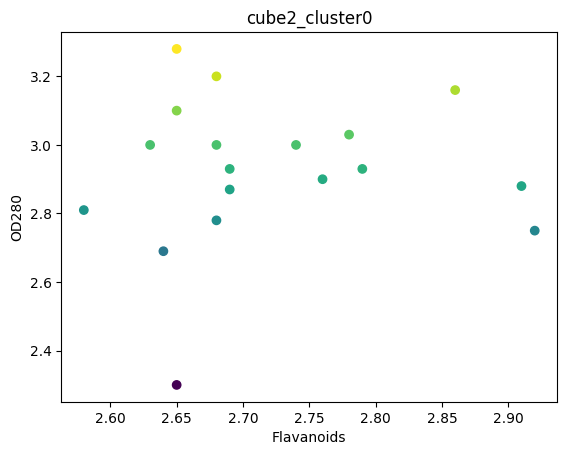

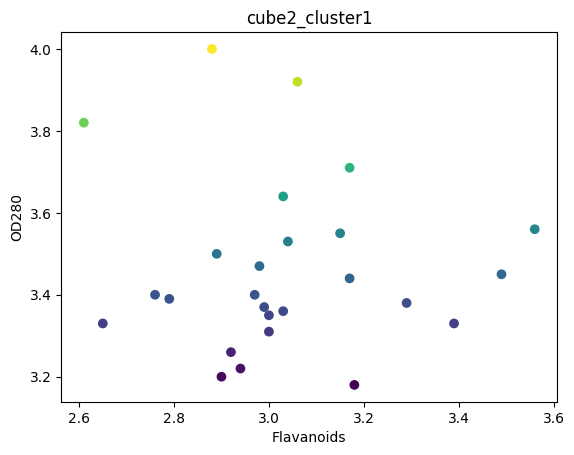

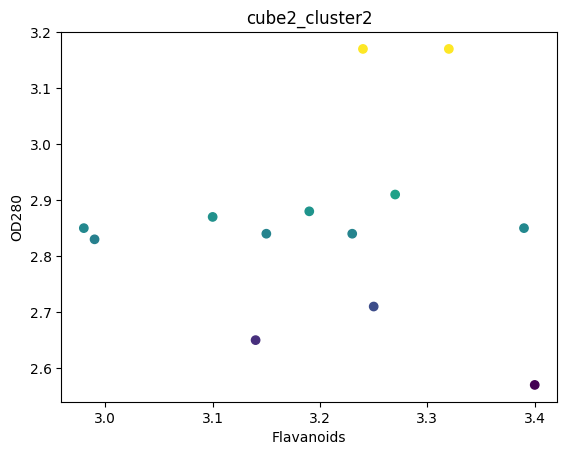

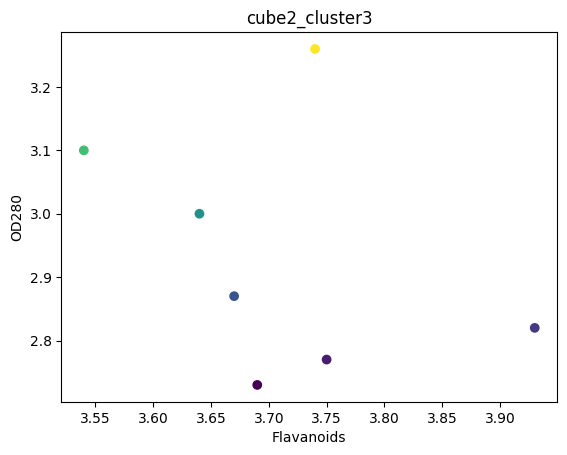

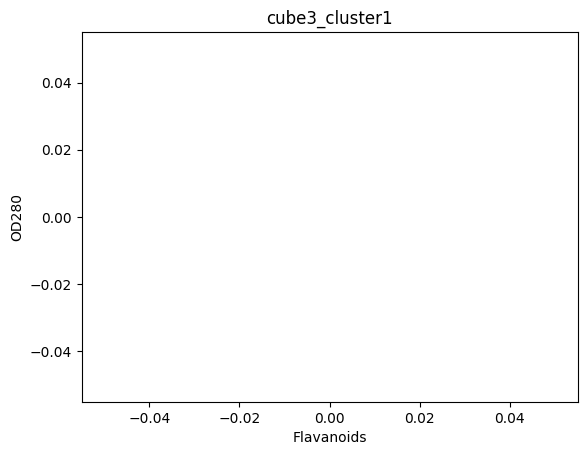

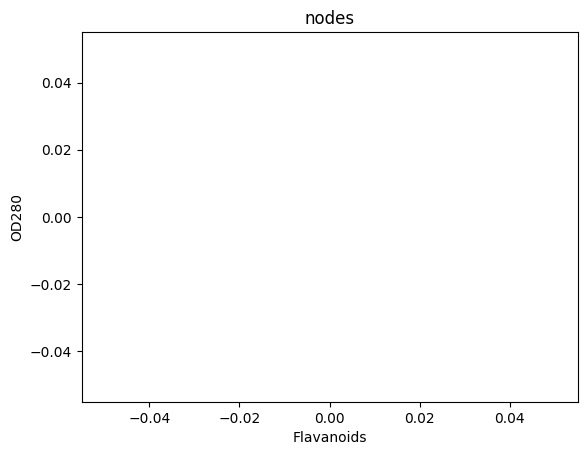

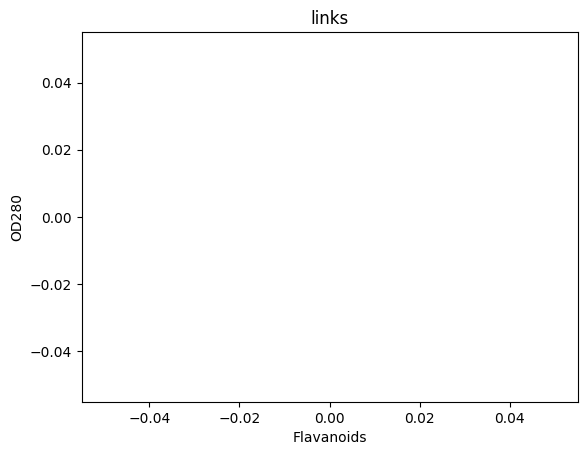

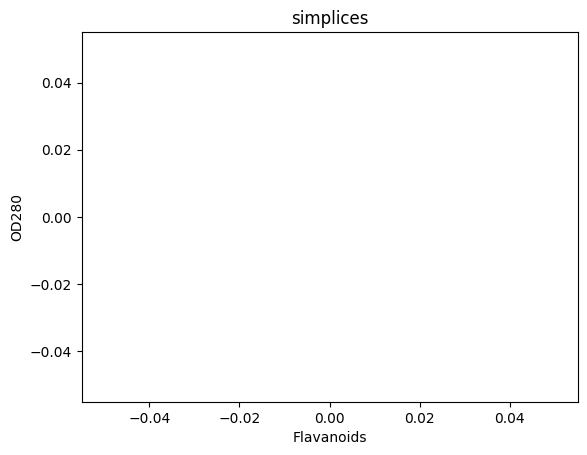

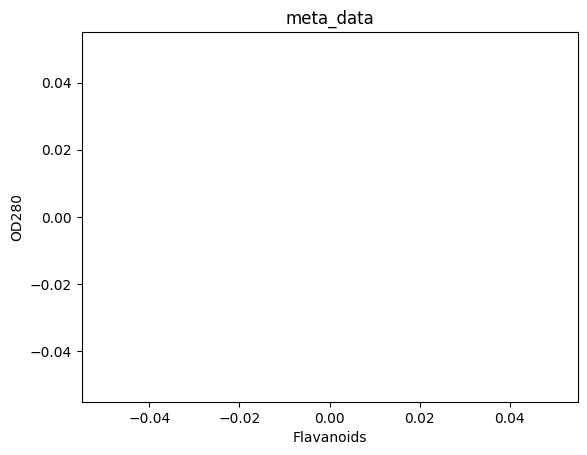

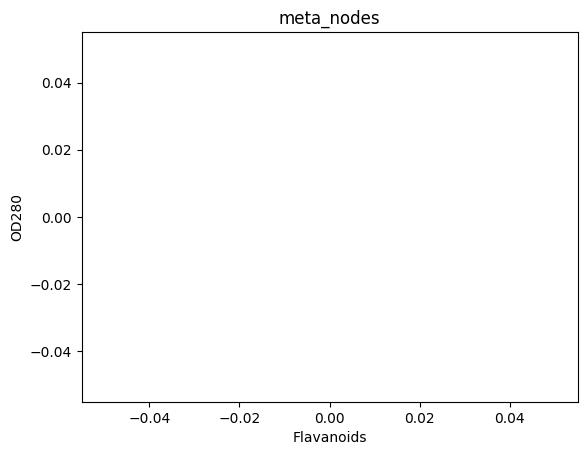

In [60]:
import matplotlib.pyplot as plt

# Obtener la lista de todos los nodos en el grafo G
nodos = list(G['nodes'].keys())

# Iterar sobre todos los nodos
for nodo in nodos:
    mvstwo_cube3c1 = df1.iloc[G['nodes'][nodo], :]
    x = mvstwo_cube3c1[var1]
    y = mean_other_score[G['nodes'][nodo]]

    # Crear el gráfico de dispersión
    scatter = plt.scatter(x=x, y=y, c=y, cmap='viridis')

    # Configurar título y ejes
    plt.title(nodo)
    plt.xlabel(var1)
    plt.ylabel(var2)

    # Mostrar el gráfico
    plt.show()
